In [3]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
(x_train,y_train), (x_test,y_test)= datasets.cifar10.load_data()

170508288/170498071 [==============================] - 66s 0us/step


In [6]:
x_train.shape, y_train.shape

((50000, 32, 32, 3), (50000, 1))

In [7]:
x_test.shape, y_test.shape

((10000, 32, 32, 3), (10000, 1))

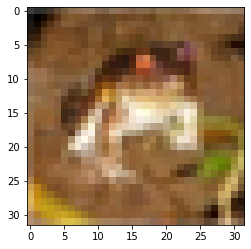

In [19]:

plt.imshow(x_train[0])

In [9]:
y_train[0]

array([6], dtype=uint8)

In [20]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [24]:
def fig_plot(x,y,index):
    plt.title(classes[y[index]])
    plt.imshow(x[index])
    plt.figsize=(10,10)

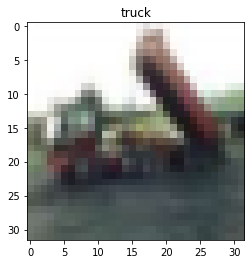

In [25]:
fig_plot(x_train,y_train,2)

In [26]:
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

# Normalize x set

In [27]:
x_train=x_train/255
x_test=x_test/255

# Convolutional neural network

In [32]:
cnn=models.Sequential([
    layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),   #average pooling bhi kr sakte
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),    
    
    
    layers.Flatten(),
    layers.Dense(30,activation='relu'),
    layers.Dense(10,activation='softmax')
])

In [38]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
cnn.fit(x_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 31s 18ms/step - loss: 1.5136 - accuracy: 0.4521
Epoch 2/10
1563/1563 [==============================] - 28s 18ms/step - loss: 1.1574 - accuracy: 0.5928
Epoch 3/10
1563/1563 [==============================] - 26s 17ms/step - loss: 1.0211 - accuracy: 0.6454
Epoch 4/10
1563/1563 [==============================] - 27s 17ms/step - loss: 0.9422 - accuracy: 0.6736
Epoch 5/10
1563/1563 [==============================] - 27s 17ms/step - loss: 0.8815 - accuracy: 0.6948
Epoch 6/10
1563/1563 [==============================] - 27s 17ms/step - loss: 0.8311 - accuracy: 0.7134
Epoch 7/10
1563/1563 [==============================] - 27s 17ms/step - loss: 0.7888 - accuracy: 0.7285
Epoch 8/10
1563/1563 [==============================] - 27s 17ms/step - loss: 0.7484 - accuracy: 0.7417
Epoch 9/10
1563/1563 [==============================] - 27s 17ms/step - loss: 0.7169 - accuracy: 0.7514
Epoch 10/10
1563/1563 [==============================] - 27s 17m

In [39]:
cnn.evaluate(x_test,y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.9512 - accuracy: 0.6829


[0.9511822462081909, 0.6829000115394592]

In [40]:
y_pred=cnn.predict(x_test)

In [41]:
y_pred[:2]

array([[4.4636574e-04, 2.6585438e-05, 1.3192131e-03, 6.6256124e-01,
        1.1296609e-03, 3.2432267e-01, 2.6031269e-03, 3.9908881e-04,
        5.6682834e-03, 1.5236813e-03],
       [1.4393410e-04, 3.2507664e-01, 7.2961177e-07, 1.3362482e-07,
        1.0831599e-08, 3.8152232e-09, 1.4525963e-09, 1.6555008e-08,
        6.7427438e-01, 5.0414319e-04]], dtype=float32)

In [42]:
y_ans=[np.argmax(element) for element in y_pred]

In [46]:
y_ans[:10]

[3, 8, 8, 0, 6, 6, 1, 6, 3, 1]

In [45]:
y_test[:10]

array([3, 8, 8, 0, 6, 6, 1, 6, 3, 1], dtype=uint8)

In [50]:
classes[y_ans[2]],
classes[y_test[2]]

'ship'